1.import data
2.observe data via requirements
3.eda
4.

In [53]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100 #(设定能显示的行数)
pd.options.display.max_columns=100 #(设定能显示的列数)

In [2]:
train = pd.read_csv(r'/Users/paxton615/Github_Personal/database/lhy_DL_database/hw1/train.csv', encoding='big5')
test = pd.read_csv(r'/Users/paxton615/Github_Personal/database/lhy_DL_database/hw1/test.csv', header=None, encoding='big5')

本次作業使用豐原站的觀測記錄，分成 train set 跟 test set，train set 是豐原站每個月的前 20 天所有資料。test set 則是從豐原站剩下的資料中取樣出來。
train.csv: 每個月前 20 天的完整資料。
test.csv : 從剩下的資料當中取樣出連續的 10 小時為一筆，前九小時的所有觀測數據當作 feature，第十小時的 PM2.5 當作 answer。一共取出 240 筆不重複的 test data，請根據 feature 預測這 240 筆的 PM2.5。
Data 含有 18 項觀測數據 AMB_TEMP, CH4, CO, NHMC, NO, NO2, NOx, O3, PM10, PM2.5, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIREC, WIND_SPEED, WS_HR。  
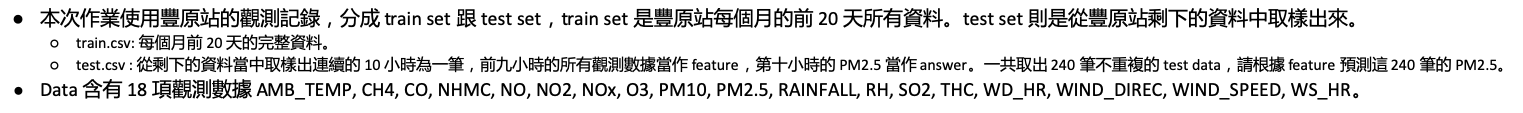

In [3]:
train.head(5)

,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,12,15,17,20,22,22,22,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,0.74,0.59,0.52,0.41,0.4,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,0.23,0.2,0.18,0.12,0.11,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,7.9,4.2,2.9,3.4,3,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [4]:
test.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18,17
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.8
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31,0.23
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29,0.1
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1,0.9


In [5]:
print(train.shape)
print(test.shape)

(4320, 27)
(4320, 11)


In [6]:
test.groupby(0).count()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
id_0,18,18,18,18,18,18,18,18,18,18
id_1,18,18,18,18,18,18,18,18,18,18
id_10,18,18,18,18,18,18,18,18,18,18
id_100,18,18,18,18,18,18,18,18,18,18
id_101,18,18,18,18,18,18,18,18,18,18
id_102,18,18,18,18,18,18,18,18,18,18
id_103,18,18,18,18,18,18,18,18,18,18
id_104,18,18,18,18,18,18,18,18,18,18
id_105,18,18,18,18,18,18,18,18,18,18


In [7]:
train.head(20)

,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,12,15,17,20,22,22,22,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,0.74,0.59,0.52,0.41,0.4,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,0.23,0.2,0.18,0.12,0.11,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,7.9,4.2,2.9,3.4,3,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,7.8,15,21,14,11,14,12,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,9.9,22,29,18,14,17,15,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,22,21,29,44,58,50,57,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,2,11,38,56,64,56,57,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,20,19,30,41,44,33,37,36,45,42,49,45,44,41,30,24,13


In [8]:
train[['日期','測站','測項']].nunique()

日期    240
測站      1
測項     18
dtype: int64

##### 3.eda

a. delete 测站

b. 

In [9]:
df = train

In [10]:
df.tail(60)

,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
4260,2014/12/17,豐原,SO2,5.2,5,4.9,5,5.5,5.5,5.7,5.6,5.5,5.4,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4261,2014/12/17,豐原,THC,1.9,1.9,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
4262,2014/12/17,豐原,WD_HR,69,64,60,69,65,64,65,61,61,63,64,74,70,66,71,61,66,64,77,69,67,72,68,80
4263,2014/12/17,豐原,WIND_DIREC,62,66,57,59,71,70,67,61,61,70,61,72,67,71,79,60,65,72,85,63,63,87,69,65
4264,2014/12/17,豐原,WIND_SPEED,1.4,1.3,1.3,1.9,3.6,3.5,3.9,4.7,4.9,3.5,3.5,2.1,2.9,2.3,2.3,3.6,3.8,3.5,2.2,2.9,2,2,1.4,1.3
4265,2014/12/17,豐原,WS_HR,1,1.1,1,0.9,2.5,3.3,3.7,4.5,4,3.5,3.2,1.3,2.1,2.5,1.3,2.8,3,3.3,1.6,2.2,1.8,1.1,1.1,2.3
4266,2014/12/18,豐原,AMB_TEMP,8.6,8.7,9.1,9.2,9.4,9.3,9.9,11,12,14,16,17,18,18,18,17,16,15,14,14,14,14,14,14
4267,2014/12/18,豐原,CH4,1.7,1.7,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.8,1.8,1.7,1.8,1.8,1.8
4268,2014/12/18,豐原,CO,0.22,0.23,0.21,0.21,0.23,0.25,0.28,0.48,0.65,0.5,0.38,0.37,0.37,0.38,0.32,0.28,0.31,0.51,0.59,0.47,0.36,0.46,0.41,0.35
4269,2014/12/18,豐原,NMHC,0.07,0.06,0.04,0.04,0.04,0.06,0.08,0.17,0.35,0.33,0.16,0.11,0.09,0.09,0.11,0.12,0.16,0.31,0.27,0.18,0.11,0.22,0.16,0.09


In [11]:
df.iloc[0:18] #这个取值逻辑没问题，下一段应该是df.iloc[18:36]，再下一段应该是df.iloc[36:54]...包括前不包括后

,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,12,15,17,20,22,22,22,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,0.74,0.59,0.52,0.41,0.4,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,0.23,0.2,0.18,0.12,0.11,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,7.9,4.2,2.9,3.4,3,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,7.8,15,21,14,11,14,12,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,9.9,22,29,18,14,17,15,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,22,21,29,44,58,50,57,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,2,11,38,56,64,56,57,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,20,19,30,41,44,33,37,36,45,42,49,45,44,41,30,24,13


我们寻找的数组就应该是[0:18],[18:36],[36:54], ... , [4302:4320]

In [12]:
rlst = np.arange(0,4338,18)
print(rlst[0:10])

[  0  18  36  54  72  90 108 126 144 162]


In [13]:
i = 0
pair = []
while i < 240:
    pair.append([i*18, (i+1)*18])
    i += 1

In [14]:
pair[0:5]

[[0, 18], [18, 36], [36, 54], [54, 72], [72, 90]]

In [15]:
df_lst = []
for i in pair:
    df_lst.append('df.iloc[{}:{}]'.format(i[0],i[1]))

In [16]:
len(df_lst)

240

In [17]:
df_horizontal=pd.concat([eval(i).reset_index() for i in df_lst], 
                  axis=1) # without .reset_index(), it doesn't work

In [18]:
df_hori = df_horizontal.drop(['index','測站','日期','測項'], axis=1)

In [19]:
df_hori = df_hori.replace('NR', 0)

In [20]:
df_hori = df_hori.apply(pd.to_numeric)

In [21]:
df_hori

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,...,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,14.00,14.00,14.00,13.00,12.00,12.00,12.00,12.00,15.00,17.00,20.00,22.00,22.00,22.00,22.00,22.00,21.00,19.00,17.00,16.00,15.00,15.00,15.00,15.00,16.00,15.00,15.00,14.00,14.00,15.00,16.00,16.00,17.00,20.00,22.00,23.00,24.00,24.00,24.00,24.00,23.00,21.00,20.00,19.00,18.00,18.00,18.00,18.00,18.00,18.00,...,14.00,14.00,13.00,14.00,14.00,14.00,14.00,14.00,15.00,15.00,15.00,15.00,16.00,16.00,15.00,14.00,14.00,14.00,14.00,14.00,14.00,15.00,14.00,14.00,14.00,15.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,15.00,15.00,16.00,17.00,18.00,19.00,18.00,17.00,16.0,15.00,14.00,13.00,13.00,13.00,13.00
1,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.70,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.70,1.8,1.80,1.80,1.80,1.80,1.80,1.80
2,0.51,0.41,0.39,0.37,0.35,0.30,0.37,0.47,0.78,0.74,0.59,0.52,0.41,0.40,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32,0.26,0.25,0.28,0.27,0.24,0.26,0.34,0.56,0.79,1.05,0.30,0.37,0.43,0.42,0.34,0.35,0.38,0.61,0.44,0.40,0.40,0.55,0.41,0.33,0.32,0.35,...,0.41,0.35,0.35,0.35,0.37,0.38,0.40,0.42,0.52,0.82,0.98,0.48,0.42,0.40,0.31,0.22,0.21,0.22,0.21,0.48,0.38,0.29,0.31,0.26,0.20,0.19,0.21,0.20,0.17,0.17,0.16,0.14,0.15,0.21,0.20,0.22,0.22,0.23,0.24,0.23,0.24,0.27,0.31,0.5,0.55,0.48,0.47,0.51,0.57,0.56
3,0.20,0.15,0.13,0.12,0.11,0.06,0.10,0.13,0.26,0.23,0.20,0.18,0.12,0.11,0.10,0.13,0.14,0.23,0.18,0.12,0.10,0.09,0.10,0.08,0.06,0.05,0.06,0.05,0.05,0.07,0.09,0.19,0.31,0.50,0.13,0.18,0.16,0.15,0.12,0.16,0.23,0.32,0.18,0.15,0.23,0.29,0.17,0.12,0.12,0.18,...,0.16,0.09,0.10,0.10,0.21,0.12,0.14,0.14,0.27,0.36,0.45,0.25,0.27,0.22,0.15,0.06,0.05,0.06,0.06,0.31,0.15,0.15,0.22,0.08,0.03,0.04,0.06,0.09,0.05,0.06,0.05,0.04,0.03,0.05,0.09,0.09,0.07,0.07,0.06,0.05,0.08,0.11,0.23,0.3,0.20,0.15,0.16,0.16,0.19,0.19
4,0.90,0.60,0.50,1.70,1.80,1.50,1.90,2.20,6.60,7.90,4.20,2.90,3.40,3.00,2.50,2.20,2.50,2.30,2.10,1.90,1.50,1.60,1.80,1.50,1.40,1.10,1.30,1.00,1.20,1.10,1.60,8.40,17.00,17.00,2.20,4.80,5.30,3.50,2.30,2.40,2.40,3.50,1.50,1.40,1.50,1.50,1.50,1.70,1.20,1.30,...,1.70,1.10,0.90,0.50,0.50,1.10,1.50,1.60,1.80,5.90,22.00,4.10,4.30,2.50,2.10,1.60,1.60,1.50,1.90,4.10,3.50,1.60,1.80,1.40,1.50,1.40,1.40,1.60,1.30,0.30,0.30,0.50,0.30,0.80,1.40,2.00,1.90,1.50,1.50,1.30,1.30,1.30,0.90,1.1,1.30,1.00,1.50,1.50,1.10,1.30
5,16.00,9.20,8.20,6.90,6.80,3.80,6.90,7.80,15.00,21.00,14.00,11.00,14.00,12.00,11.00,11.00,22.00,28.00,19.00,12.00,8.10,7.00,6.90,6.00,3.70,3.20,3.30,3.10,3.10,4.30,9.40,19.00,26.00,36.00,8.40,17.00,24.00,18.00,12.00,16.00,18.00,25.00,15.00,12.00,13.00,21.00,15.00,9.10,8.00,9.70,...,14.00,8.40,8.00,7.00,8.00,7.00,7.10,7.70,16.00,29.00,33.00,24.00,19.00,17.00,12.00,7.50,7.20,7.70,6.40,25.00,18.00,11.00,14.00,8.90,4.40,3.70,8.50,8.70,4.10,6.30,4.30,4.00,4.40,7.30,7.60,8.10,7.00,6.50,6.40,5.70,6.10,8.00,11.00,18.0,19.00,13.00,13.00,13.00,13.00,14.00
6,17.00,9.80,8.70,8.60,8.50,5.30,8.80,9.90,22.00,29.00,18.00,14.00,17.00,15.00,14.00,13.00,25.00,30.00,21.00,13.00,9.70,8.60,8.70,7.50,5.00,4.30,4.70,4.10,4.30,5.50,11.00,27.00,43.00,53.00,11.00,22.00,29.00,21.00,14.00,18.00,20.00,28.00,16.00,13.00,14.00,22.00,17.00,11.00,9.20,11.00,...,15.00,9.60,8.80,7.50,8.50,8.20,8.60,9.30,18.00,35.00,55.00,28.00,24.00,20.00,15.00,9.10,8.80,9.20,8.30,29.00,21.00,12.00,16.00,10.00,5.90,5.10,9.90,10.00,5.40,6.60,4.60,4.50,4.80,8.10,9.00,10.00,8.90,8.00,7.90,7.00,7.40,9.30,11.00,19.0,21.00,14.00,15.00,15.00,14.00,15

In [22]:
df_hori.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
19    float64
20    float64
21    float64
22    float64
23    float64
Length: 5760, dtype: object

##### 在df_hori的基础上，先分出12个月，
##### 在每个月中，每10个小时作为一组，其中，9小时为data，第10小时为target。因为每月有480个小时,因此这样的data, 应该有471个(每月)
##### 471*12个月 = 5652 组data, 相应的, target也有5652个

In [38]:
df_hori.iloc[:,0:10].iloc[:,-1]

0      17.00
1       1.80
2       0.74
3       0.23
4       7.90
5      21.00
6      29.00
7      29.00
8      38.00
9      30.00
10      0.00
11     56.00
12     15.00
13      2.00
14     46.00
15    153.00
16      0.80
17      0.30
Name: 9, dtype: float64

In [26]:
df_hori.iloc[:,1:11]

,1,2,3,4,5,6,7,8,9,10
0,14.00,14.00,13.00,12.00,12.00,12.00,12.00,15.00,17.00,20.00
1,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
2,0.41,0.39,0.37,0.35,0.30,0.37,0.47,0.78,0.74,0.59
3,0.15,0.13,0.12,0.11,0.06,0.10,0.13,0.26,0.23,0.20
4,0.60,0.50,1.70,1.80,1.50,1.90,2.20,6.60,7.90,4.20
5,9.20,8.20,6.90,6.80,3.80,6.90,7.80,15.00,21.00,14.00
6,9.80,8.70,8.60,8.50,5.30,8.80,9.90,22.00,29.00,18.00
7,30.00,27.00,23.00,24.00,28.00,24.00,22.00,21.00,29.00,44.00
8,50.00,48.00,35.00,25.00,12.00,4.00,2.00,11.00,38.00,56.00
9,39.00,36.00,35.00,31.00,28.00,25.00,20.00,19.00,30.00,41.00


In [41]:
train.shape

(4320, 27)

##### Try solution's method, the logic is very clear.  Good practice for data engineering.

In [43]:
train.head(2)

,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,12,15,17,20,22,22,22,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8


In [45]:
raw = train.iloc[:,3:]

In [49]:
raw[raw == 'NR'] = 0

<ipython-input-49-92680ac5b0ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw[raw == 'NR'] = 0
/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


#### 突然明白为何要转numpy了，方便接下来直接用python内置的[ : , : ]方式来操纵内容

In [51]:
raw_data = raw.to_numpy()

In [54]:
raw_data

array([['14', '14', '14', ..., '15', '15', '15'],
       ['1.8', '1.8', '1.8', ..., '1.8', '1.8', '1.8'],
       ['0.51', '0.41', '0.39', ..., '0.35', '0.36', '0.32'],
       ...,
       ['36', '55', '72', ..., '118', '100', '105'],
       ['1.9', '2.4', '1.9', ..., '1.5', '2', '2'],
       ['0.7', '0.8', '1.8', ..., '1.6', '1.8', '2']], dtype=object)

In [60]:
raw_data.shape # 每18行*24hours是一天的数据，每20天的数据是一个月，一共12个月

(4320, 24)

目标是：每18行*24小时为一天的基本结构不变，将‘竖条’型的data‘横过来’

1.np.empty(18,5760) 这是我的想法，solution和我不同

1.a. solution的解决方案是以月的单位建立frame，我不明白为什么，难道将来需要以月为单位分析数据么？

2.接下来就是数据的切割了，使用for loop一块儿块儿的按月搬数据到指定位置。基本逻辑是，按月封装，每个月应该有24（小时每天）*20（天）= 480列记录，12月总共应该有5760列记录

3.用dict重新封装，以月作为key


In [64]:
month_data = {}
for month in range(12):
    sample = np.empty([18,480]) # []很容易被遗忘
    
    for day in range(20):
        
#  前半部分的sample解决往哪些区域写，后半部分该提供内容了
        
        sample[:,day*24:(day+1)*24] = raw_data[(20*month+day)*18:(20*month+day+1)*18,:]

#     注意sample的封装位置,在month的循环下，每完成一个整的month的内容就封装一次,key就是每一个遍历的month

    month_data[month]= sample
    
#     numpy的计算效率非常高！肉眼可见逗比pandas要快很多

In [65]:
month_data

{0: array([[14.  , 14.  , 14.  , ..., 14.  , 13.  , 13.  ],
        [ 1.8 ,  1.8 ,  1.8 , ...,  1.8 ,  1.8 ,  1.8 ],
        [ 0.51,  0.41,  0.39, ...,  0.34,  0.41,  0.43],
        ...,
        [35.  , 79.  ,  2.4 , ..., 48.  , 63.  , 53.  ],
        [ 1.4 ,  1.8 ,  1.  , ...,  1.1 ,  1.9 ,  1.9 ],
        [ 0.5 ,  0.9 ,  0.6 , ...,  1.2 ,  1.2 ,  1.3 ]]),
 1: array([[ 15.  ,  14.  ,  14.  , ...,   8.4 ,   8.  ,   7.6 ],
        [  1.8 ,   1.8 ,   1.7 , ...,   1.7 ,   1.7 ,   1.7 ],
        [  0.27,   0.26,   0.25, ...,   0.36,   0.35,   0.32],
        ...,
        [113.  , 109.  , 104.  , ...,  72.  ,  65.  ,  69.  ],
        [  2.3 ,   2.2 ,   2.6 , ...,   1.9 ,   2.9 ,   1.5 ],
        [  2.5 ,   2.2 ,   2.2 , ...,   0.9 ,   1.6 ,   1.1 ]]),
 2: array([[ 18.  ,  18.  ,  18.  , ...,  14.  ,  13.  ,  13.  ],
        [  1.8 ,   1.8 ,   1.8 , ...,   1.8 ,   1.8 ,   1.8 ],
        [  0.39,   0.36,   0.4 , ...,   0.42,   0.47,   0.49],
        ...,
        [103.  , 128.  , 115.  , ...,  

### 重要：在设计data结构的时候，总是从小到大的去建立这个结构，才能找到一个清晰的思维框架

### *** 目前这种month_data的组织方式是横向的，features在行方向上，很明显，需要将它以某种方式给竖起来

next step：

每月480小时，每9小时形成一个data，故每月有471个data；全年就是471x12个data；其中每一个data都有9x18个features的体量
对应的target也是471x12个（第10个小时的PM2.5是目标）

In [176]:
# 1.用np.empty()搭框架

x = np.empty([12*471, 9*18], dtype= float)
y = np.empty([12*471, 1], dtype= float)
# 体会：说实话,比较难想象data的样子，以后最好还是能出图，再变成代码.

In [177]:
# 2.用loop填入数据
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14: 
# 以上不好理解的就是houor > 14, 这么想，如果hour是15, 则15+9=24，超出[0,23]的取值范围（这里说的是一天24小时在python中的取值）
                continue
# 接下来也算是比较神奇的操作，较难理解的是数据空间上的转换，这里用的是np,我认为pandas也能somehow实现
#             注意：转换后的x，y淡化了年月日的概念，focus在x，y的位置对应上。
            x[month*471 + day*24 +hour, :] = month_data[month][:, day*24 + hour : day * 24 + hour + 9].reshape(1,-1)
            y[month*471 + day*24 +hour, 0] = month_data[month][9, day*24 + hour + 9]

In [178]:
print(x.shape)
print(y.shape)

(5652, 162)
(5652, 1)


In [179]:
x

array([[14. , 14. , 14. , ...,  2. ,  2. ,  0.5],
       [14. , 14. , 13. , ...,  2. ,  0.5,  0.3],
       [14. , 13. , 12. , ...,  0.5,  0.3,  0.8],
       ...,
       [17. , 18. , 19. , ...,  1.1,  1.4,  1.3],
       [18. , 19. , 18. , ...,  1.4,  1.3,  1.6],
       [19. , 18. , 17. , ...,  1.3,  1.6,  1.8]])

In [180]:
y

array([[30.],
       [41.],
       [44.],
       ...,
       [17.],
       [24.],
       [29.]])

### Normalize
过程依然不是非常直观，但需要focus的是，normalize是针对每一个元素进行的标准化。
但是因为在本例中，元素所属于的月份不同，均值和标准差需要逐月计算。

In [184]:
mean_x = np.mean(x, axis=0) #对每行取均值，合理。取出的就是每个feature的均值
print(mean_x.shape)
print(mean_x)

(162,)
[2.25365180e+01 2.25432413e+01 2.25497877e+01 2.25536801e+01
 2.25559802e+01 2.25562279e+01 2.25562456e+01 2.25552548e+01
 2.25517162e+01 1.70238854e+00 1.70230007e+00 1.70217622e+00
 1.70214084e+00 1.70201699e+00 1.70196391e+00 1.70189314e+00
 1.70185775e+00 1.70178698e+00 3.89033970e-01 3.88934890e-01
 3.88959660e-01 3.89166667e-01 3.89334749e-01 3.89370134e-01
 3.89304671e-01 3.89071125e-01 3.88581033e-01 1.40153928e-01
 1.40187544e-01 1.40438783e-01 1.40796178e-01 1.41013800e-01
 1.41086341e-01 1.41127035e-01 1.41095188e-01 1.40916490e-01
 2.14743454e+00 2.15033616e+00 2.15251238e+00 2.15507785e+00
 2.15559094e+00 2.15580326e+00 2.15553786e+00 2.15373319e+00
 2.14856688e+00 1.01164897e+01 1.01188606e+01 1.01283793e+01
 1.01436837e+01 1.01568117e+01 1.01639597e+01 1.01680290e+01
 1.01668790e+01 1.01600318e+01 1.22496461e+01 1.22547063e+01
 1.22666136e+01 1.22848195e+01 1.22985846e+01 1.23057856e+01
 1.23097311e+01 1.23066879e+01 1.22947983e+01 3.18957006e+01
 3.19431175e+01 3

In [185]:
std_x = np.std(x, axis=0)
print(std_x.shape)
print(std_x)

(162,)
[ 6.28492341  6.28716061  6.29020697  6.29307145  6.29572176  6.29854833
  6.30157151  6.30461971  6.30810055  0.1258782   0.12585876  0.12583988
  0.12584048  0.12584956  0.12587148  0.12588662  0.12590121  0.12590223
  0.32613624  0.32609996  0.3260708   0.32605536  0.32606044  0.32604933
  0.32604299  0.32600697  0.32586854  0.10445539  0.1044395   0.1046868
  0.10506596  0.10520688  0.10519009  0.1051768   0.10514954  0.10508098
  2.29609706  2.29791935  2.2977232   2.29828255  2.29814586  2.29803601
  2.29774023  2.29743508  2.2929628   6.20168435  6.20286429  6.20735997
  6.2137359   6.21724748  6.21522012  6.21389434  6.21248258  6.21119177
  7.60534775  7.60802674  7.61251565  7.61762304  7.61914967  7.61659176
  7.61521651  7.61413145  7.61097383 18.77011328 18.78673915 18.79668523
 18.79801691 18.7956666  18.79071398 18.78729407 18.78347343 18.78241411
 26.29765779 26.29362965 26.2805205  26.2704289  26.27023754 26.27022415
 26.26176336 26.24868698 26.23604568 16.71668

In [186]:
for i in range(len(x)):
#     len(x)的长度这里是5652行
    for j in range(len(x[0])):
#         len(x[0])这里长度是162，9*18，是每单个data的体量
        if std_x[j] != 0:
#         上面算过mean_x和std_x的长度都是162
            x[i][j] = (x[i][j] - mean_x[j] / std_x[j] )
#     x是一个有5652行x162列的矩阵。x[0]是第一行，x[0][0]是第一行第一列的那个元素，
# x[0][0]所对应的mean和std也是按列计算出来的,就是上面的[j]
# 简单的说i是按行loop，j是按列loop

In [187]:
x

array([[ 1.04141937e+01,  1.04144003e+01,  1.04150961e+01, ...,
         3.92184893e-01,  3.91931659e-01, -1.10959063e+00],
       [ 1.04141937e+01,  1.04144003e+01,  9.41509607e+00, ...,
         3.92184893e-01, -1.10806834e+00, -1.30959063e+00],
       [ 1.04141937e+01,  9.41440028e+00,  8.41509607e+00, ...,
        -1.10781511e+00, -1.30806834e+00, -8.09590631e-01],
       ...,
       [ 1.34141937e+01,  1.44144003e+01,  1.54150961e+01, ...,
        -5.07815107e-01, -2.08068341e-01, -3.09590631e-01],
       [ 1.44141937e+01,  1.54144003e+01,  1.44150961e+01, ...,
        -2.07815107e-01, -3.08068341e-01, -9.59063148e-03],
       [ 1.54141937e+01,  1.44144003e+01,  1.34150961e+01, ...,
        -3.07815107e-01, -8.06834072e-03,  1.90409369e-01]])

### Split train and validation sets

In [191]:
import math
x_train_set = x[:math.floor(len(x)*0.8) , :]
y_train_set = y[:math.floor(len(x)*0.8) , :]
x_validation = x[math.floor(len(x)*0.8): , :]
y_validation = y[math.floor(len(x)*0.8): , :]
print(x_train_set)
print(y_train_set)
print(x_validation)
print(y_validation)
print(len(x_train_set))
print(len(y_train_set))
print(len(x_validation))
print(len(y_validation))

[[10.41419369 10.41440028 10.41509607 ...  0.39218489  0.39193166
  -1.10959063]
 [10.41419369 10.41440028  9.41509607 ...  0.39218489 -1.10806834
  -1.30959063]
 [10.41419369  9.41440028  8.41509607 ... -1.10781511 -1.30806834
  -0.80959063]
 ...
 [24.41419369 23.41440028 21.41509607 ...  1.59218489  0.39193166
  -0.30959063]
 [23.41419369 21.41440028 19.41509607 ...  0.39218489 -0.30806834
  -0.30959063]
 [21.41419369 19.41440028 19.41509607 ... -0.30781511 -0.30806834
  -0.80959063]]
[[30.]
 [41.]
 [44.]
 ...
 [ 7.]
 [ 5.]
 [14.]]
[[ 1.94141937e+01  1.94144003e+01  1.94150961e+01 ... -3.07815107e-01
  -8.08068341e-01 -5.09590631e-01]
 [ 1.94141937e+01  1.94144003e+01  2.04150961e+01 ... -8.07815107e-01
  -5.08068341e-01  6.90409369e-01]
 [ 1.94141937e+01  2.04144003e+01  2.04150961e+01 ... -5.07815107e-01
   6.91931659e-01 -9.59063148e-03]
 ...
 [ 1.34141937e+01  1.44144003e+01  1.54150961e+01 ... -5.07815107e-01
  -2.08068341e-01 -3.09590631e-01]
 [ 1.44141937e+01  1.54144003e+01  

### Regression and gradient descent

In [193]:
dim = 18*9 + 1 # 1 is intercept
w = np.zeros([dim,1]) # weight

x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
learning_rate = 100
iter_time = 1000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001

for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w) - y, 2 ))/471/12) # rmse
    if(t%100==0):
        print(str(t) + ':' + str(loss))
    gradient = 2 * np.dot(x.transpose(), np.dot(x, w) - y) # dimension*1
    adagrad += gradient ** 2
    w = w -learning_rate * gradient / np.sqrt(adagrad + eps)
    np.save('weight.npy', w)
    w

0:27.071214829194115
100:228.53922806879152
200:53.698412452178744
300:27.815425887981057
400:19.34472469554899
500:15.557117138450737
600:13.509561287195275
700:12.211436460143585
800:11.292767499293697
900:10.595655828529505
